# Here we show how to apply acceptance functions to the spacial muon distribution

In [1]:
import sys
import numpy as np
import pandas as pd

basedir='/Users/bono/Desktop/gm2FieldAnalysis/MuonConvolution/'

#import the relevant field moments functions
path = basedir + 'field_info'
sys.path.insert(0,path)
from format_field import field_team_to_standard_moments as ftts
from field_grid import *

#import the relevant synthesis tools
path = basedir + 'synthesis'
sys.path.insert(0,path)
from spacial_tools import moments_method as mm

path= basedir + 'tracker_info'
sys.path.append(path)
from beam_moments import *
from transform_beam import *
from beam_moments import get_normalized_distribution_moments as gndm

### Get the tracker distribution for station 12

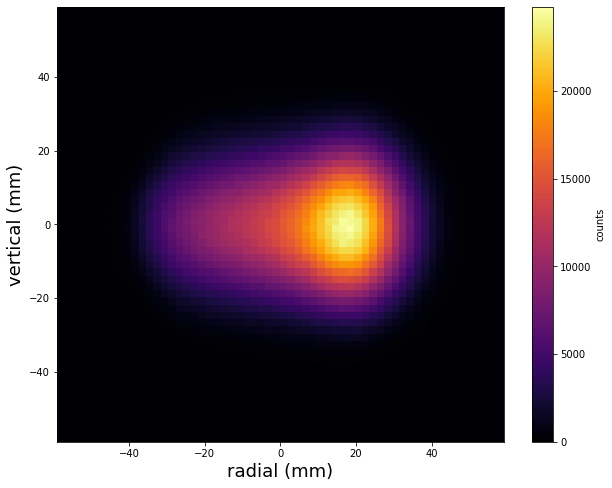

In [2]:
df_tracker = get_df_tracker()
mask12 = (df_tracker["Station"] == 'station12')
df_12 = df_tracker[mask12].copy()
df_12['counts_norm'] = df_12['counts']/df_12['counts'].sum()
df_12.head()
fig = plot_beam(df_12,bins=60)
fig

### invent some acceptance function

1576.0


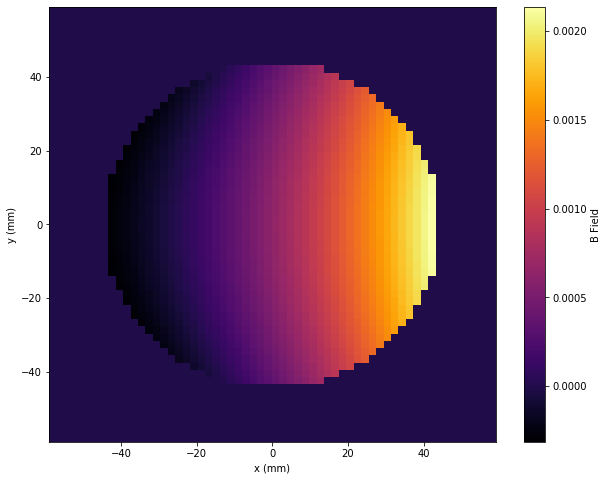

In [68]:
#generate
acc = [1,2,0,0.5,0]
#make the df representing the grid with appropriate col names
df_acc = get_field_grid(acc)
df_acc.rename(columns={"B": "acc"},inplace=True)
#make all values outside of the storage volume zero
mask = (df_acc['x']**2 + df_acc['y']**2 > 45**2)
df_acc.loc[mask,'acc'] = 0
#normalize
N = df_acc['acc'].sum()
print(N)
df_acc['acc'] = df_acc['acc']/N
df_acc
fig = plot_field(df_acc,var='acc')
fig

### Take the hadamard product of the acceptance and beam functions

In [69]:
df_12['counts_acc'] = df_12['counts']*df_acc['acc']

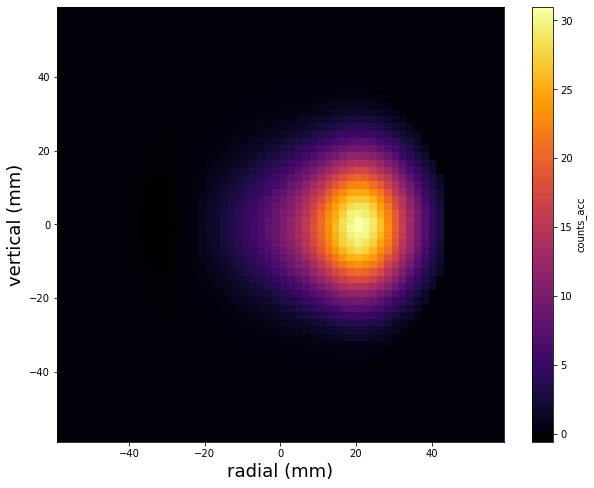

In [70]:
fig = plot_beam(df_12,var='counts_acc')
fig